# método mínimos cuadrados ponderado

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bhm")

In [4]:
datos= np.genfromtxt("ej-ajuste-04.txt")
x= datos[:,0]
y= datos[:,1]
dy= datos[:,2]

<ErrorbarContainer object of 3 artists>

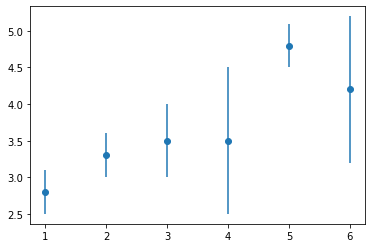

In [5]:
plt.errorbar(x,y,dy, fmt="o")

In [6]:
p = 1/(dy**2)

In [9]:
np.polyfit(x,y,1,w=1/dy) #w != p

array([0.45713123, 2.34204248])

In [10]:
from scipy.stats import linregress

In [11]:
from scipy.optimize import curve_fit

In [13]:
def f(x,a,b):
    return a+b*np.log(x)

In [16]:
a_cf, b_cf = curve_fit(f,x,y, sigma=dy)[0]

Text(0, 0.5, '$y$')

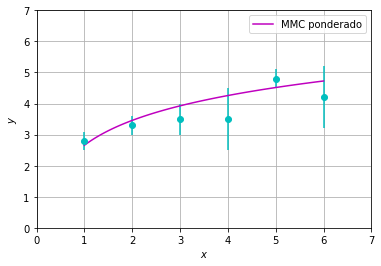

In [19]:
plt.errorbar(x,y, yerr=dy , fmt="o", color="c")
xx= np.linspace(1,6,100)
plt.plot(xx,f(xx, a_cf , b_cf), label= "MMC ponderado",color="m")
plt.legend()
plt.xlim(0,7)
plt.ylim(0,7)
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [21]:
from scipy.optimize import leastsq
#minimiza la suma de la funcion q uno le de al cuadrado

In [23]:
def respon(a,x,y,dy):
    return (y-a[0]-a[1]*x)/dy
#se eleva sola al cuadrado

In [27]:
a_in=[1,1]
a_ls= leastsq(respon,a_in,args=(x,y,dy))[0]

Text(0, 0.5, '$(y-f(x))/ \\Delta y$')

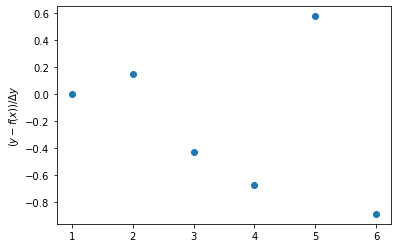

In [30]:
#Analisis de residuos ponderados !!!
plt.scatter(x,respon(a_ls,x,y,dy))
plt.ylabel("$(y-f(x))/ \Delta y$")